# Keras

Can use Tensorflow, Theano, CNTK as backends. Tensorflow is the most popular and backed by Google.

[Why Keras?](https://keras.io/why-use-keras/)

```
pip install keras
```

(60000, 28, 28)
(10000, 28, 28)


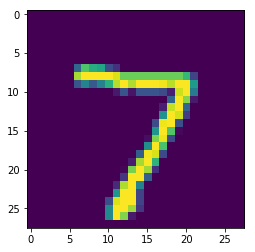

In [68]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

In [69]:
#flatten 2 image dimesions to one
train_images = train_images.reshape((60000, 28 * 28))
#scale to range [0,1]
train_images = train_images.astype('float32') / 255

#the same for test set
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

#vectorize labels
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [70]:
# https://keras.io/models/sequential/
network = Sequential()
#relu = lambda x: max(0, x)
network.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(Dense(10, activation='softmax'))
sgd = SGD(lr=0.01)
network.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [71]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 2s 30us/step - loss: 1.0713 - acc: 0.7719
Epoch 2/5
60000/60000 [==============================] - 2s 28us/step - loss: 0.5181 - acc: 0.8728
Epoch 3/5
60000/60000 [==============================] - 2s 31us/step - loss: 0.4191 - acc: 0.8902
Epoch 4/5
60000/60000 [==============================] - 2s 29us/step - loss: 0.3736 - acc: 0.8995
Epoch 5/5
60000/60000 [==============================] - 2s 28us/step - loss: 0.3455 - acc: 0.9053


In [72]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 43us/step
test_acc: 0.9128


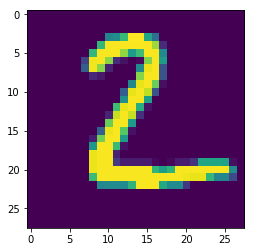

In [102]:
import matplotlib.pyplot as plt
plt.imshow(test_images[1].reshape(28, 28))

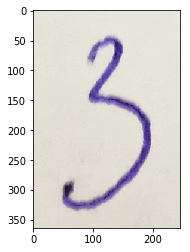

In [73]:
from PIL import Image, ImageChops
tryLoadImage = Image.open('./digits/digit_3.png')
plt.imshow(tryLoadImage)

In [98]:
import numpy as np
import PIL.ImageOps  

def loadAndFitImage(im):
    # trim borders
    bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    bbox = diff.getbbox()
    result = im
    if bbox:
        result = im.crop(bbox)
    # convert to greyscale and resize
    result = result.convert('L')
    result.thumbnail((18, 18))
    # add borders again to fit to 28*28
    if result.width < 28 or result.height < 28:
        bg = Image.new('L', (28, 28), 'white')
        xCoord = (28 - result.width) // 2
        yCoord = (28 - result.height) // 2
        bg.paste(result, (xCoord, yCoord))
        result = bg
    return result

def preprocessImage(fileName):
    imSample = loadAndFitImage(Image.open(fileName).convert('1'))
    imSample = PIL.ImageOps.invert(imSample)
    #scale
    return np.array(imSample).reshape(-1).astype('float32') / 255

In [99]:
from os import walk

f = []
for (dirpath, dirnames, filenames) in walk('./digits'):
    f.extend(map(lambda n: './digits/' + n, filenames))
    break
print(f)

['./digits/digit_8.png', './digits/digit_2.png', './digits/digit_0.png', './digits/digit_6.png', './digits/digit_9.png', './digits/digit_1.png', './digits/digit_5.png', './digits/digit_3.png', './digits/digit_7.png', './digits/digit_4.png']


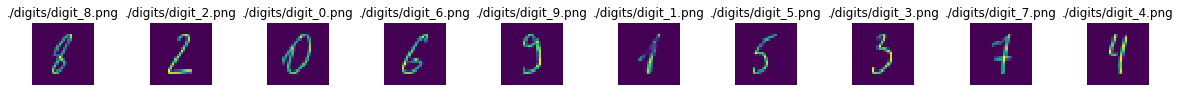

In [100]:
testImages = list(zip(map(preprocessImage, f), f))
plt.figure(figsize=(20,2))
for index, (im, name) in enumerate(testImages):
    plt.subplot(1, len(testImages), index + 1)
    plt.axis('off')
    plt.imshow(im.reshape((28, 28)))
    plt.title('%s' % name)
plt.subplots_adjust(wspace=0.9)

In [101]:
myTestSet = np.array(list(zip(*testImages))[0])
print(myTestSet[0:1].shape)
print(train_images.shape)
preds = network.predict(myTestSet)
print(np.argmax(preds, axis=1))
preds2 = network.predict(test_images[1:2])
print(np.argmax(preds2, axis=1))

(1, 784)
(60000, 784)
[8 2 0 6 7 1 5 5 7 4]
[2]
